### General Metrics

In [68]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("AllCollected.csv",parse_dates=True)
data.describe()

ILI rates           flu      the flu    flu fever    flu cough  \
count  4383.000000   4383.000000  4383.000000  4383.000000  4383.000000   
mean      9.015017   1790.906964   176.007278    28.231099    23.333207   
std      12.518105   3792.763355   224.121708    35.446697    29.074445   
min       1.060000      0.000000     0.000000     0.000000     0.000000   
25%       2.725000    599.855084    72.616690     0.000000     0.000000   
50%       5.920000    969.169855   124.679952    21.467188    16.844010   
75%       9.977855   1721.850455   218.769738    40.014423    35.532842   
max     148.500000  70894.611800  4758.568730   510.236844   237.052631   

          flu like  flu medicine  flu and cough  colds and flu      got flu  \
count  4383.000000   4383.000000    4383.000000    4383.000000  4383.000000   
mean     36.355111     16.721315       9.358843      13.450199    16.255157   
std      32.670947     22.417660      16.222707      23.471229    27.470761   
min       0.000000      0.000000       0.000000       0.000000     0.000000   
25%       0.000000      0.000000       0.000000       0.000000     0.000000   
50%      35.289560     14.601456       0.000000       0.000000     0.000000   
75%      53.680246     26.557018      15.951339      18.433863    23.144368   
max     386.211375    238.864595     226.314884     233.533358   380.644184   

             ...          symptoms of arthritis  gout symptoms  fever adults  \
count        ...                    4383.000000    4383.000000   4383.000000   
mean         ...                      30.945083      51.770439     28.429419   
std          ...                      29.700655      39.458917     29.914993   
min          ...                       0.000000       0.000000      0.000000   
25%          ...                       0.000000      24.734450      0.000000   
50%          ...                      29.623561      47.411502     24.651515   
75%          ...                      44.702726      73.868098     43.247678   
max          ...                     352.670124     411.094654    250.618956   

       malaria medication  cold sores contagious  viral pneumonia  \
count         4383.000000            4383.000000      4383.000000   
mean             8.980505               6.550710         9.163068   
std             19.725562              12.637481        18.216539   
min              0.000000               0.000000         0.000000   
25%              0.000000               0.000000         0.000000   
50%              0.000000               0.000000         0.000000   
75%             14.622820              14.220849        15.189842   
max            233.737214             187.163194       307.472604   

       i have a sore throat  shingles jab  migraine treatment  \
count           4383.000000   4383.000000         4383.000000   
mean              13.052511      1.990830           22.726127   
std               16.845456      6.566380           26.096795   
min                0.000000      0.000000            0.000000   
25%                0.000000      0.000000            0.000000   
50%                0.000000      0.000000           18.453376   
75%               21.898963      0.000000           33.264655   
max              173.195590    123.647766          284.433242   

       stop tickly cough  
count        4383.000000  
mean            6.007894  
std            11.234567  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%            13.900000  
max           126.000000  

[8 rows x 1001 columns]

In [3]:
# print(data.columns)
# print(data.columns[0])
# print(data.Date[0])
# print(data['Date'][0])
# data['Date'] = pd.to_datetime(data.Date)
# data['Date'] = data['Date'].dt.strftime('%m/%d/%Y')
# print(list(data.Date))


### What the data looks like

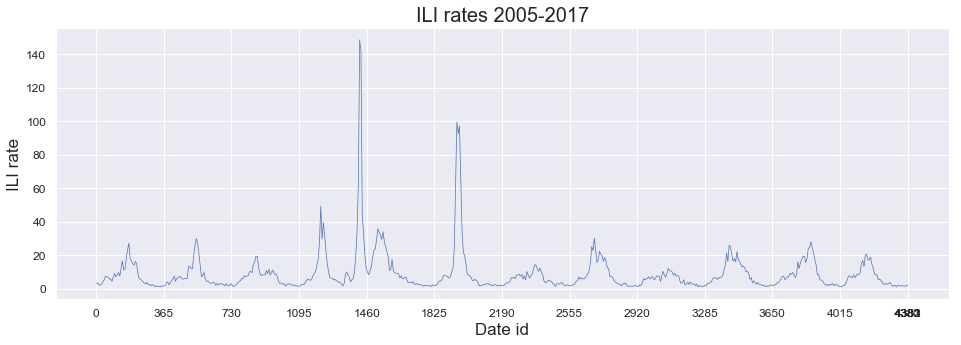

      id        Date
0      0  24/08/2005
1    365  24/08/2006
2    730  24/08/2007
3   1095  23/08/2008
4   1460  23/08/2009
5   1825  23/08/2010
6   2190  23/08/2011
7   2555  22/08/2012
8   2920  22/08/2013
9   3285  22/08/2014
10  3650  22/08/2015
11  4015  21/08/2016
12  4380  21/08/2017


In [65]:
def firstGlanceInfo():
    plt.figure(figsize=(16,5))
    sns.set(style="darkgrid") 

    yearIntervals = 365
    id = [i for i in range(0, 4383)]
    xAxisRange = list(range(0,4383,yearIntervals)) + [4381,4382,4383]

    plt.xlabel('Date id', fontsize=17)
    plt.ylabel('ILI rate', fontsize=17)
    plt.title('ILI rates 2005-2017', fontsize=20)

    plt.plot( id ,data['ILI rates'], linewidth=0.7)
    plt.xticks(xAxisRange , fontsize= 12)
    plt.yticks(fontsize= 12)
    plt.show()

    dateStrings = list(data.Date)
    idDates = pd.DataFrame()
    idDates['id'] = xAxisRange[:-3]
    idDates['Date'] = [dateStrings[i] for i in xAxisRange[:-3]]
    print(idDates)

firstGlanceInfo()


### Finding the Pearson Coefficient of the top 50 queries within a 300 samplesize

In [76]:
from scipy.stats.stats import pearsonr

numberOfTopQueries = 50
outOf1000 = 300
def ourPearsonCoeff(query):
    topQueries = []
    for querySearched in query:
        pc = pearsonr(data[querySearched],data['ILI rates'] )
        topQueries.append((pc[0], querySearched))
    topQueries.sort(key = lambda x: x[0], reverse=True)
    topQueries = topQueries[0:numberOfTopQueries]
    
    tablePC = pd.DataFrame()
    tablePC['Query'] = [x[1] for x in topQueries]
    tablePC['Pearson Coefficient'] = [x[0] for x in topQueries]
    
    print(tablePC)
    return topQueries
    
searchTerms1 = ourPearsonCoeff(list(data.columns[2:outOf1000]))



                             Query  Pearson Coefficient
0                     flu symptoms             0.791556
1               symptoms swine flu             0.735598
2                          flu nhs             0.735557
3                  symptoms of flu             0.733316
4                 flu symptoms nhs             0.725726
5                     flu how long             0.722550
6            symptoms of swine flu             0.699449
7                    nhs swine flu             0.693900
8                   flu incubation             0.676212
9                              flu             0.657753
10                      i have flu             0.654235
11                     flu symptom             0.650504
12                         the flu             0.631682
13                    pregnant flu             0.629881
14              signs of swine flu             0.628162
15                the flu symptoms             0.627022
16                   flu pregnancy             0